## Question 8.a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from asg3_module import *

In [2]:
train = np.loadtxt('data/EMGaussian.train')

We now initialize and train an initial K-Means clustering model for plotting.

In [3]:
kmeans = KMeans()
kmeans.cluster(train)

We will now plot the results obtained by each of these six models in order to compare the obtained clusterings visually.

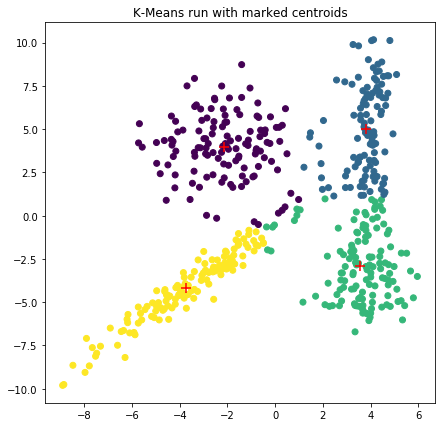

In [4]:
plt.figure(figsize = (7,7))
plt.scatter(train[:,0],train[:,1], c = np.nonzero(kmeans.cluster_map)[1])
plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1], marker = '+', color = 'red', s = 100)
plt.title("K-Means run with marked centroids")
plt.savefig("Figures/kmeans.png")

We now run 5 independent initializations and compare achieved results.

In [5]:
kmeans = [KMeans() for i in range(5)]
for km,i in zip(kmeans,range(len(kmeans))):
    km.cluster(train)
    
    print("Run ", i+1)
    print("------------")
    print("Centroids: \n", km.centroids)
    print("Distortion measure: ", km.get_distortion_measure())
    print("------------\n")

Run  1
------------
Centroids: 
 [[ 3.60401871 -2.88772669]
 [-2.1554649   4.11299388]
 [ 3.78809286  4.99905357]
 [-3.6366214  -4.05302194]]
Distortion measure:  3240.5930247455117
------------

Run  2
------------
Centroids: 
 [[-3.72020481 -4.1849974 ]
 [ 3.78809286  4.99905357]
 [-2.14180002  3.97338429]
 [ 3.57429183 -2.880828  ]]
Distortion measure:  3240.1732663625185
------------

Run  3
------------
Centroids: 
 [[-3.6366214  -4.05302194]
 [-2.1554649   4.11299388]
 [ 3.60401871 -2.88772669]
 [ 3.78809286  4.99905357]]
Distortion measure:  3240.5930247455117
------------

Run  4
------------
Centroids: 
 [[-3.81879354 -4.27423441]
 [ 3.80280826  5.10467248]
 [ 3.33557966 -2.644529  ]
 [-2.24034752  4.12744772]]
Distortion measure:  3237.779596496135
------------

Run  5
------------
Centroids: 
 [[-2.1554649   4.11299388]
 [ 3.78809286  4.99905357]
 [-3.6366214  -4.05302194]
 [ 3.60401871 -2.88772669]]
Distortion measure:  3240.5930247455117
------------



In general we see there is little variability between the achieved results, both in terms of total distortion measure and in terms of the centroids. In this run we have some initializations achieving the same centroid values. We can conclude from this that the data is robust to initialization choices for the centroids. This can be justified somewhat by the form of the data. Indeed, each cluster center is relatively well spread out from the other, giving us four distinct clusters in a two-dimensional space. 

## Question 8.b)

In [6]:
gmm = GMM_isotropic()
gmm.cluster(train)

Given our trained model, we are ready to plot the data, gaussian contours, centers and cluster assignment in the same plot. We do so by assigning the same colour to data of the same cluster, and mark the means in red, as for KMeans.

In [98]:
def plot_gmm_clustering(data,labels, model, title, figure_path,scale=1,n_points=200):
    xlim = min(data[:,0])*scale, max(data[:,0]*scale)
    ylim = min(data[:,1]*scale), max(data[:,1]*scale)

    xx = np.linspace(xlim[0],xlim[1], n_points)
    yy = np.linspace(ylim[0],ylim[1], n_points)

    X,Y = np.meshgrid(xx,yy)
    points = np.transpose(np.array([X.flatten(), Y.flatten()]))
    
    
    fig = plt.figure(figsize = (10,10))
    plt.title(title)
    plt.scatter(data[:,0], data[:,1], c = labels)
    plt.scatter(model.mu[:,0], model.mu[:,1], color = 'red', marker='+', s = 100)
    for cluster in range(4):
        CS = plt.contour(X,Y, np.reshape([model.iso_density(point,model.mu[cluster], model.sigma[cluster])for point in points], (n_points,n_points)))
    plt.clabel(CS, inline=1, fontsize=10)
    fig.savefig(figure_path)
    plt.show()

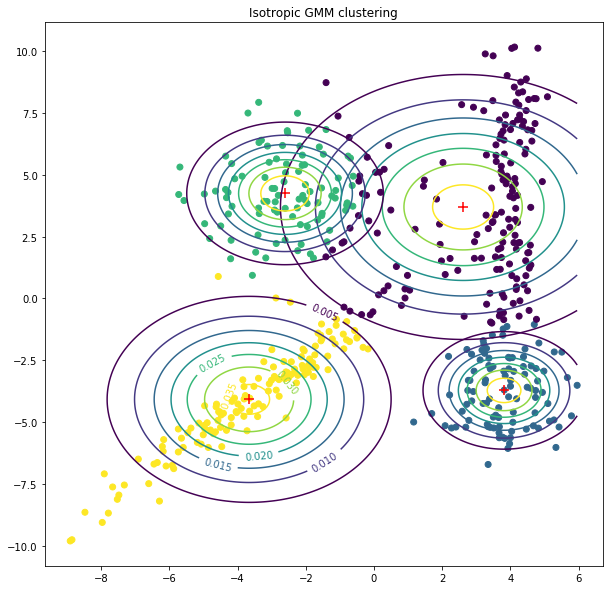

In [100]:
plot_gmm_clustering(train, np.argmax(gmm.tau,axis =1), model = gmm, title = 'Isotropic GMM clustering', figure_path='Figures/isotropic_gmm.png')

## Question 8.c)